In [20]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as cte

In [21]:
#Initial parameters
m = 0.255 * u.kg
R = (4.5 * u.cm).to(u.m)
l = (10 * u.cm).to(u.m)
L = (70 * u.cm).to(u.m)
I = ((3/5) * m * R**2) 
the = np.arctan(R/l)
phi = np.arctan((5*u.cm).to(u.m)/L)
psi = (15 * u.degree).to(u.rad)

In [22]:
#Validating tangents condition and calculating equilibrium psi
if np.tan(phi) < np.tan(psi)*np.tan(the):
  print("The condition is accomplished:", (np.tan(phi)*u.rad).to(u.deg).round(3), "<",
        (np.tan(psi)*np.tan(the)*u.rad).to(u.deg).round(3))
else:
  print("The condition isn't accomplished, change initial parameters")

#Getting the equilibrium angle of the setting
eq_psi = np.arctan(np.tan(phi)/np.tan(the))
print("The equilibrium psi angle is:", eq_psi.to(u.deg).round(2))

The condition is accomplished: 4.093 deg < 6.909 deg
The equilibrium psi angle is: 9.02 deg


# Data Analysis

In [76]:
#Defining the data analysis function with ploting v vs x
def anDat (loc, cant, tmax_id, deg):
    data_tot = pd.DataFrame()
    data_prom = pd.DataFrame()
    for i in range(1, cant+1, 1):
        data = pd.read_csv(loc + str(i) + ".csv", skiprows=1)
        data_tot["t_" + str(i)] = data.t
        data_tot["x_" + str(i)] = data.x
        data_tot["y_" + str(i)] = data.y
        data_tot["v_" + str(i)] = data.v
        data_tot["v_" + str(i)][0] = 0
        plt.plot(data.x[0:90],data.v[0:90], "--", label=str(i))
        plt.title(r"$\psi =" + deg + "°$ raw data", size=14)
        plt.xlabel(r"$x[m]$", size=12)
        plt.ylabel(r"$v[\frac{m}{s^2}]$", size=12)
        plt.grid(alpha=0.4)
        plt.legend()
    
    data_tot.drop(range(tmax_id,len(data_tot),1), axis=0, inplace=True)

    for i in ["t", "x", "y", "v"]:
        data_prom[i] = round(data_tot[[i+"_"+str(1),i+"_"+str(2),
                                i+"_"+str(3),i+"_"+str(4),
                                i+"_"+str(5),i+"_"+str(6),
                                i+"_"+str(7)]].mean(axis=1, skipna=True),4)
    
    plt.figure()
    plt.plot(data_prom.x, data_prom.v, "--", color="purple")
    plt.title(r"$\psi =" + deg + "°$ mean data", size=14)
    plt.xlabel(r"$x[m]$", size=12)
    plt.ylabel(r"$v[\frac{m}{s^2}]$", size=12)
    plt.grid(alpha=0.4)

    return data_prom

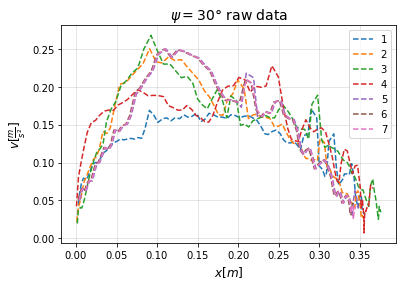

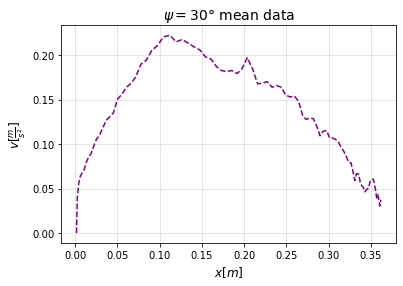

In [77]:
data30 = anDat("../Data/30/", 7, 89, "30")
# data30.to_csv("data_prom_30.csv", sep=",", index=False)

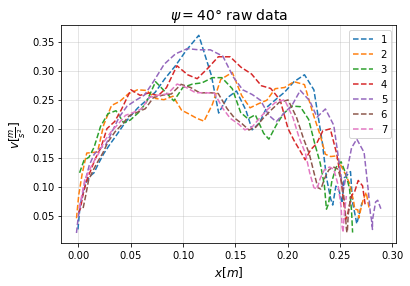

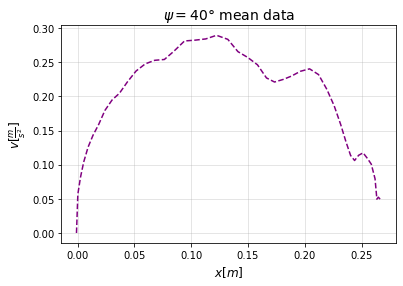

In [84]:
data40 = anDat("../Data/40/", 7, 45, "40")
data40.to_csv("data_prom_40.csv", sep=",", index=False)

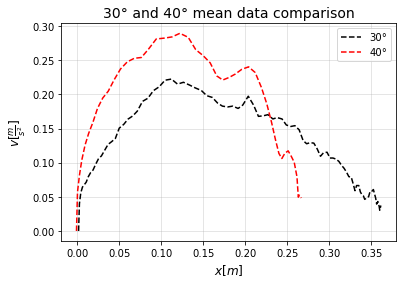

In [104]:
plt.plot(data30.x, data30.v, "k--", label="30°")
plt.plot(data40.x, data40.v, "r--", label="40°")
plt.title("30° and 40° mean data comparison", size=14)
plt.xlabel(r"$x[m]$", size=12)
plt.ylabel(r"$v[\frac{m}{s^2}]$", size=12)
plt.grid(alpha=0.4)
plt.legend()

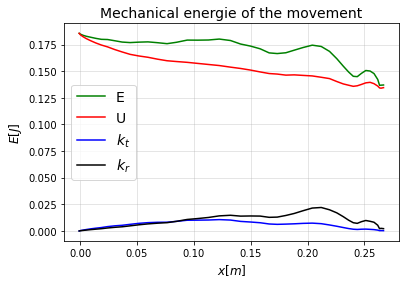

In [114]:
#Mechanical energy conservation
def r(x):
    r = R.value - np.tan(the)*np.tan(psi)*x
    return r
def MechEn(data):
    U = m*cte.g0*data.y
    Kt = 0.5*m*data.v**2
    Kr = 0.5*I*(data.v/r(data.x))**2
    Em = U+Kt+Kr
    plt.plot(data.x,Em, "g", label="E")
    plt.plot(data.x,U, "r", label="U")
    plt.plot(data.x,Kt, "b", label=r"$k_t$")
    plt.plot(data.x,Kr, "k", label=r"$k_r$")
    plt.title("Mechanical energie of the movement", size=14)
    plt.xlabel(r"$x[m]$", size=12)
    plt.ylabel(r"$E[J]$", size=12)
    plt.grid(alpha=0.4)
    plt.legend(prop={"size":14})

MechEn(data40)
# plt.plot(data_prom.x, np.full(len(data_prom.x),0))

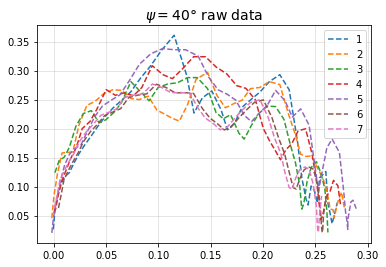

In [80]:
data_tot = pd.DataFrame()
data_prom = pd.DataFrame()
for i in range(1, 8, 1):
    data = pd.read_csv("../Data/40/" + str(i) + ".csv", skiprows=1)
    data_tot["t_" + str(i)] = data.t
    data_tot["x_" + str(i)] = data.x
    data_tot["y_" + str(i)] = data.y
    data_tot["v_" + str(i)] = data.v
    data_tot["v_" + str(i)][0] = 0
    plt.plot(data.x,data.v, "--", label=str(i))
    plt.title(r"$\psi =40°$ raw data", size=14)
    # plt.xlabel(r"$x[m]$", size=12)
    # plt.ylabel(r"$v[\frac{m}{s^2}]$", size=12)
    plt.grid(alpha=0.4)
    plt.legend()
data_tot.to_csv("Datos 40 raw.csv", sep=",", index=False)

In [92]:
np.sqrt(10*cte.g0.value*(-data40.y[len(data40.t)-1]+data40.y[0])/3*R.value**2)

0.03674745848354686

# Theoretical Model


In [49]:
niu_k= 0.4

t_1 = np.linspace(0,2.4,50) * u.s
angle_1 = np.full(50,the)

In [50]:
def R(angle,times):
  X = 0.5*cte.g0*(np.sin(angle)-niu_k*np.cos(angle))*(times**2)
  
  return X

In [51]:
r_pos=R(angle_1, t_1)

In [52]:
x_pos=r_pos*np.cos(angle_1)
y_pos=r_pos*np.sin(angle_1)

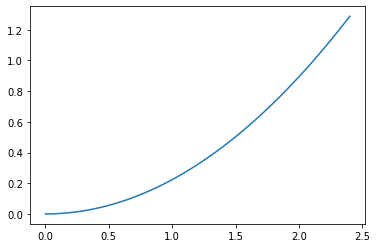

In [57]:
plt.plot(t_1,r_pos)